## Data Analysis
---

- Define Method
- Features to train and test
- Predictive Model
- Evaluation Metrics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
%matplotlib inline

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#from sklearn.cross_validation import cross_val_score

### Crime; type of crime, municipality

In [4]:
df_crime = pd.read_csv('../data/crime/crimes_municipality_ingest.tsv', sep='\t', index_col=0)

In [5]:
#Nearest Neighbor & Kernel Regression

In [6]:
df_crime.head()

,CBScode,Perioden,"HIC: Diefstal/inbraak woning, voltooid","HIC: Diefstal/inbraak woning, pogingen",HIC: Geweldsmisdrijven,HIC: Straatroof,HIC: Overvallen,Aantasting openbare orde,Bedreiging,Brand/ontploffing,...,Openlijk geweld (persoon),Vernieling cq. zaakbeschadiging,Wapenhandel,Zakkenrollerij,Zedenmisdrijf,Municipality,Province,Population,Population_density(p/km),Municipality Size
0,GM0003,2014JJ00,17.0,8.0,82.0,0.0,1.0,1.0,31.0,4.0,...,4.0,78.0,0.0,2.0,5.0,Appingedam,Groningen,12049.0,507.0,Small
1,GM0003,2015JJ00,26.0,7.0,67.0,0.0,0.0,2.0,30.0,2.0,...,1.0,57.0,2.0,4.0,4.0,Appingedam,Groningen,12049.0,507.0,Small
2,GM0003,2016JJ00,24.0,12.0,67.0,0.0,1.0,3.0,27.0,0.0,...,0.0,54.0,1.0,3.0,3.0,Appingedam,Groningen,12049.0,507.0,Small
3,GM0003,2017JJ00,10.0,2.0,72.0,2.0,4.0,4.0,18.0,6.0,...,8.0,34.0,0.0,0.0,8.0,Appingedam,Groningen,12049.0,507.0,Small
4,GM0005,2014JJ00,13.0,5.0,22.0,0.0,1.0,0.0,8.0,0.0,...,0.0,80.0,0.0,6.0,0.0,Bedum,Groningen,10475.0,236.0,Small


In [7]:
df_crime = df_crime.replace([np.inf, -np.inf, np.nan], 0)

In [8]:
X = df_crime.select_dtypes(exclude='object')
X = X.loc[:, X.columns != '  HIC: Diefstal/inbraak woning, pogingen'].values
y = df_crime['  HIC: Diefstal/inbraak woning, pogingen'].values

In [48]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.33,random_state=4)

In [78]:
from sklearn.svm import SVR

In [ ]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

In [ ]:
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
#Decision Tree Regression
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Plotting Cross-Validated Predictions


This example shows how to use `cross_val_predict` to visualize prediction
errors.



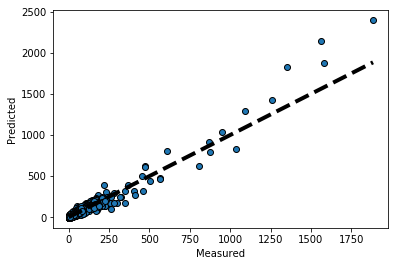

In [9]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()